In [5]:
import pandas as pd

File = pd.read_csv("auto_sales.csv")
Auto_sales = pd.DataFrame(File)
Auto_sales.drop(columns = "Unnamed: 0", axis = 1, inplace = True)
Auto_sales.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [7]:
Auto_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

In [9]:
Sales_year = Auto_sales.groupby("Year")["Automobile_Sales"].mean()
Sales_year.head()

Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
1984    2972.250000
Name: Automobile_Sales, dtype: float64

In [11]:
Auto_sales[Auto_sales["Recession"] == 1]["Year"].unique()

array([1980, 1981, 1982, 1983, 1990, 1991, 1992, 2000, 2001, 2002, 2008,
       2009, 2020])

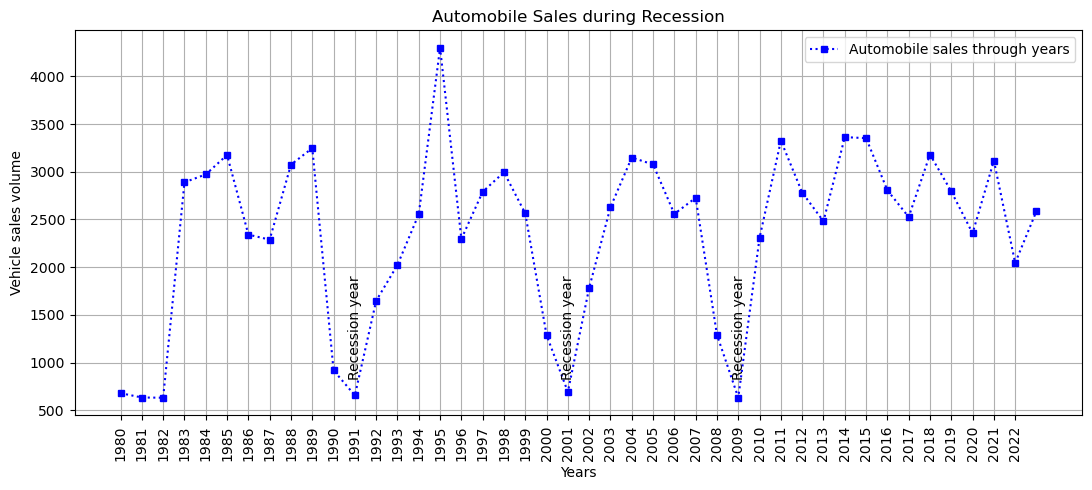

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (13, 5))
ax.plot(Sales_year.index, 
        Sales_year.values,
        marker = "s",
        markersize = 5,
        color = "blue", 
        linestyle = "dotted",
        label = "Automobile sales through years")

ax.set_xlabel("Years")
ax.set_ylabel("Vehicle sales volume")
ax.set_xticks(range(1980, 2023)) 
ax.tick_params(axis = "x", rotation = 90)
ax.set_title("Automobile Sales during Recession")

recessions = [{"year": 1990.7, "sales": 850}, 
             {"year": 2000.7, "sales": 850}, 
             {"year": 2008.7, "sales": 850}] 

for years in recessions:
    ax.annotate("Recession year", xy = (years["year"], years["sales"]), rotation = 90, )
plt.grid(True)
plt.legend()
plt.savefig("Line_Plot_1.jpeg")
plt.show()

In [14]:
Auto_sales["Vehicle_Type"].unique()

array(['Supperminicar', 'Mediumfamilycar', 'Smallfamiliycar', 'Sports',
       'Executivecar'], dtype=object)

In [17]:
Auto_sales_rec = Auto_sales[Auto_sales["Recession"] == 1]
Auto_sales_rec["Recession"].value_counts()

Recession
1    113
Name: count, dtype: int64

In [19]:
Type_sales = Auto_sales_rec.groupby(["Year", "Vehicle_Type"])["Automobile_Sales"].mean()
Type_sales =pd.DataFrame(Type_sales)
Type_sales.reset_index(inplace = True)

In [21]:
Type_sales.head()

,Year,Vehicle_Type,Automobile_Sales
0,1980,Mediumfamilycar,720.625000
1,1980,Smallfamiliycar,695.233333
2,1980,Supperminicar,635.840000
3,1981,Mediumfamilycar,628.400000
4,1981,Smallfamiliycar,638.420000


In [23]:
Medium_family_car = Type_sales[Type_sales["Vehicle_Type"] == "Mediumfamilycar"]
Medium_family_car.rename(columns = {"Automobile_Sales": "Mediumfamilycar"}, inplace = True)
Medium_family_car.drop(columns = "Vehicle_Type", inplace = True)
Medium_family_car.head()

C:\Users\prien\AppData\Local\Temp\ipykernel_9192\820050785.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Medium_family_car.rename(columns = {"Automobile_Sales": "Mediumfamilycar"}, inplace = True)
C:\Users\prien\AppData\Local\Temp\ipykernel_9192\820050785.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Medium_family_car.drop(columns = "Vehicle_Type", inplace = True)


,Year,Mediumfamilycar
0,1980,720.625000
3,1981,628.400000
6,1982,723.271429
10,1990,659.733333
14,1991,642.140000


In [25]:
Medium_family_car.set_index("Year", inplace = True)

In [27]:
Medium_family_car.head(4)

,Mediumfamilycar
Year,
1980,720.625000
1981,628.400000
1982,723.271429
1990,659.733333


In [29]:
Supper_mini_car = Type_sales[Type_sales["Vehicle_Type"] == "Supperminicar"]
Supper_mini_car.rename(columns = {"Automobile_Sales": "Supperminicar"}, inplace = True)
Supper_mini_car.drop(columns = "Vehicle_Type", inplace = True)
Supper_mini_car.head()

C:\Users\prien\AppData\Local\Temp\ipykernel_9192\1701735302.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Supper_mini_car.rename(columns = {"Automobile_Sales": "Supperminicar"}, inplace = True)
C:\Users\prien\AppData\Local\Temp\ipykernel_9192\1701735302.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Supper_mini_car.drop(columns = "Vehicle_Type", inplace = True)


,Year,Supperminicar
2,1980,635.84
5,1981,630.90
12,1990,754.80
16,1991,650.05
18,1992,686.10


In [31]:
Supper_mini_car.set_index("Year", inplace = True)

In [32]:
Small_familiy_car = Type_sales[Type_sales["Vehicle_Type"] == "Smallfamiliycar"]
Small_familiy_car.rename(columns = {"Automobile_Sales": "Smallfamiliycar"}, inplace = True)
Small_familiy_car.drop(columns = "Vehicle_Type", inplace = True)
Small_familiy_car.head()

C:\Users\prien\AppData\Local\Temp\ipykernel_9192\1063395201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Small_familiy_car.rename(columns = {"Automobile_Sales": "Smallfamiliycar"}, inplace = True)
C:\Users\prien\AppData\Local\Temp\ipykernel_9192\1063395201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Small_familiy_car.drop(columns = "Vehicle_Type", inplace = True)


,Year,Smallfamiliycar
1,1980,695.233333
4,1981,638.420000
7,1982,602.225000
9,1983,589.000000
11,1990,629.257143


In [35]:
Small_familiy_car.set_index("Year", inplace = True)

In [37]:
Sports = Type_sales[Type_sales["Vehicle_Type"] == "Sports"]
Sports.rename(columns = {"Automobile_Sales": "Sports"}, inplace = True)
Sports.drop(columns = "Vehicle_Type", inplace = True)
Sports.head()

C:\Users\prien\AppData\Local\Temp\ipykernel_9192\1140008549.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sports.rename(columns = {"Automobile_Sales": "Sports"}, inplace = True)
C:\Users\prien\AppData\Local\Temp\ipykernel_9192\1140008549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Sports.drop(columns = "Vehicle_Type", inplace = True)


,Year,Sports
8,1982,102.0
21,2000,195.0
37,2020,214.0


In [39]:
Sports.set_index("Year", inplace = True)

In [41]:
Executive_car = Type_sales[Type_sales["Vehicle_Type"] == "Executivecar"]
Executive_car.rename(columns = {"Automobile_Sales": "Executivecar"}, inplace = True)
Executive_car.drop(columns = "Vehicle_Type", inplace = True)
Executive_car.head()

C:\Users\prien\AppData\Local\Temp\ipykernel_9192\10791300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Executive_car.rename(columns = {"Automobile_Sales": "Executivecar"}, inplace = True)
C:\Users\prien\AppData\Local\Temp\ipykernel_9192\10791300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Executive_car.drop(columns = "Vehicle_Type", inplace = True)


,Year,Executivecar
13,1991,564.0


In [43]:
Executive_car.set_index("Year", inplace = True)

In [45]:
Car_type_sales = pd.concat([Medium_family_car, Supper_mini_car, Small_familiy_car, Sports, Executive_car], axis = 1)
Car_type_sales

,Mediumfamilycar,Supperminicar,Smallfamiliycar,Sports,Executivecar
Year,,,,,
1980,720.625000,635.840,695.233333,NaN,NaN
1981,628.400000,630.900,638.420000,NaN,NaN
1982,723.271429,NaN,602.225000,102.0,NaN
1990,659.733333,754.800,629.257143,NaN,NaN
1991,642.140000,650.050,747.900000,NaN,564.0
1992,670.050000,686.100,NaN,NaN,NaN
2000,655.600000,686.300,623.400000,195.0,NaN
2001,689.700000,686.040,713.450000,NaN,NaN
2002,697.600000,646.250,714.500000,NaN,NaN


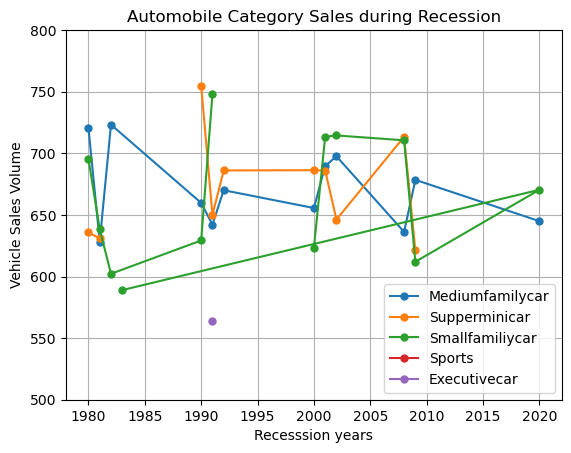

In [47]:
fig, ax = plt.subplots()
ax.plot(Car_type_sales, 
        marker = "o", 
        markersize = 5,
        label = Car_type_sales.columns)

ax.set_title("Automobile Category Sales during Recession")
ax.set_xlabel("Recesssion years")
ax.set_ylabel("Vehicle Sales Volume")
ax.set(ylim = (500,800))
ax.legend()

plt.grid(True)
plt.savefig("Line_Plot_2.jpeg")
plt.show()

In [49]:
Auto_sales.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


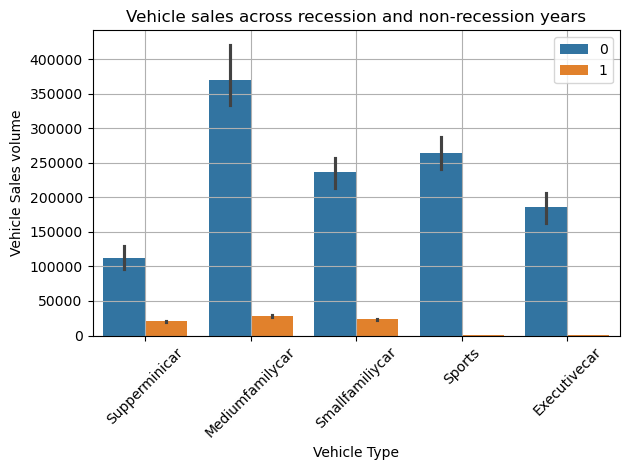

In [55]:
import numpy as np
import seaborn as sns

fig, ax = plt.subplots()
ax = sns.barplot(x = Auto_sales["Vehicle_Type"], 
                 y = Auto_sales["Automobile_Sales"], 
                 hue = Auto_sales["Recession"],
                estimator = np.sum)
ax.tick_params(axis = "x", rotation = 45)
ax.set_title("Vehicle sales across recession and non-recession years")
ax.set_xlabel("Vehicle Type")
ax.set_ylabel("Vehicle Sales volume")
ax.legend(loc = "upper right")

plt.grid(True)
plt.tight_layout()
plt.savefig("Bar_Chart.png")
plt.show()

In [340]:
Auto_sales_rec = Auto_sales[Auto_sales["Recession"] == 1].groupby("Year")["GDP"].sum()
Auto_sales_nonrec = Auto_sales[Auto_sales["Recession"] == 0].groupby("Year")["GDP"].sum()
Auto_sales_rec.head()

Year
1980    493.223
1981    427.383
1982    474.968
1983     22.287
1990    401.249
Name: GDP, dtype: float64

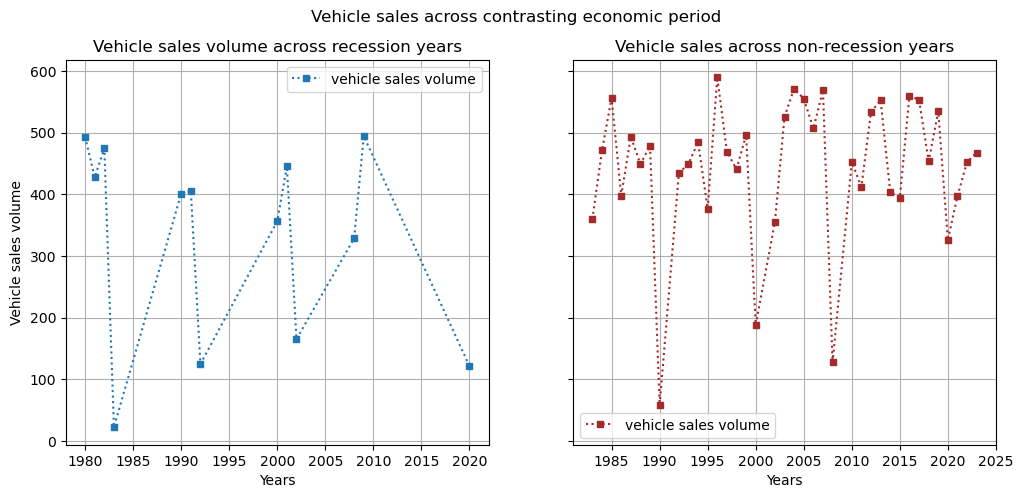

In [342]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, sharey = True, figsize = (12, 5))
ax[0].plot(Auto_sales_rec.index,
           Auto_sales_rec.values,
           marker = "s",
           markersize = 5,
           linestyle = "dotted",
           label = "vehicle sales volume")

ax[0].set_title("Vehicle sales volume across recession years")
ax[0].set_xlabel("Years")
ax[0].set_ylabel("Vehicle sales volume")
ax[0].legend()
ax[0].grid(True)
           
ax[1].plot(Auto_sales_nonrec.index,
          Auto_sales_nonrec.values,
          marker = "s",
          markersize = 5,
          linestyle = "dotted",
          color = "brown",
          label = "vehicle sales volume")
ax[1].set_title("Vehicle sales across non-recession years")
ax[1].set_xlabel("Years")
ax[1].legend()
ax[1].grid(True)

fig.suptitle("Vehicle sales across contrasting economic period")
plt.savefig("Subplot.png")
plt.show()

In [344]:
Auto_sales_nrec = Auto_sales[Auto_sales["Recession"] == 0]
Auto_sales_nrec.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
113,2/28/1983,1983,Feb,0,126.06,0.75,15201.649,4621,4,12.819,-1.119666,2.4,3799.1,Sports,Georgia
114,3/31/1983,1983,Mar,0,92.67,1.50,18359.070,3038,8,12.945,0.009733,1.5,3533.5,Smallfamiliycar,California
115,4/30/1983,1983,Apr,0,96.39,1.00,25984.306,4490,8,25.206,0.486432,2.0,3240.4,Supperminicar,Illinois
116,5/31/1983,1983,May,0,91.81,1.50,28692.333,4677,8,14.630,-0.722898,2.3,908.1,Smallfamiliycar,California
117,6/30/1983,1983,Jun,0,106.16,0.75,25856.841,2118,5,18.765,0.220357,2.3,4769.8,Mediumfamilycar,Illinois


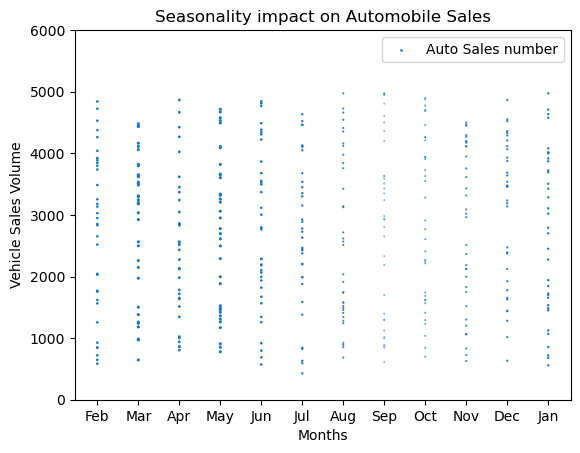

In [346]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Auto_sales_nrec["Month"],
           Auto_sales_nrec["Automobile_Sales"], 
           marker = "o", 
           s = Auto_sales_nrec["Seasonality_Weight"],
          label = "Auto Sales number")
ax.set_title("Seasonality impact on Automobile Sales")
ax.set_xlabel("Months")
ax.set_ylabel("Vehicle Sales Volume") 
ax.set(ylim = (0,6000))
ax.legend()

plt.savefig("Bubbleplot.jpeg")
plt.show()

In [347]:
Auto_sales_recc = Auto_sales[Auto_sales["Recession"] == 1]

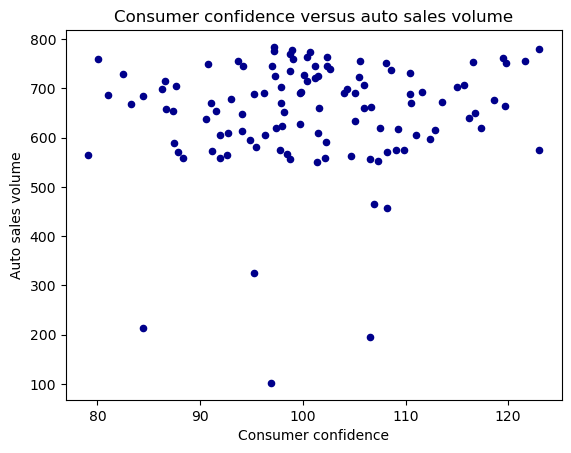

In [348]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(Auto_sales_recc["Consumer_Confidence"], 
           Auto_sales_recc["Automobile_Sales"], 
           marker = "o",
           s = 20,
           color = "darkblue")

ax.set_title("Consumer confidence versus auto sales volume")
ax.set_xlabel("Consumer confidence")
ax.set_ylabel("Auto sales volume")

plt.savefig("Scatter_plot_1.jpeg")
plt.show()

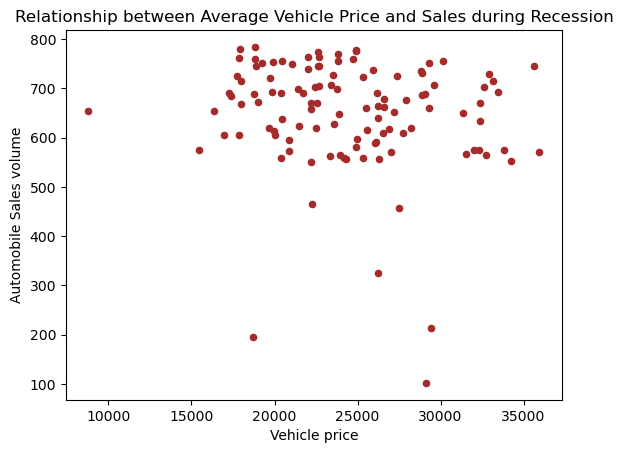

In [349]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(Auto_sales_recc["Price"], 
           Auto_sales_recc["Automobile_Sales"], 
           marker = "o",
           s = 20,
           color = "brown")

ax.set_title("Relationship between Average Vehicle Price and Sales during Recession")
ax.set_xlabel("Vehicle price")
ax.set_ylabel("Automobile Sales volume")
plt.savefig("Scatter_plot_II.jpeg")
plt.show()

In [351]:
Adv_recc = Auto_sales[Auto_sales["Recession"] == 1]["Advertising_Expenditure"].sum()
Adv_nrecc = Auto_sales[Auto_sales["Recession"] == 0]["Advertising_Expenditure"].sum()

In [353]:
Proportions = pd.DataFrame({"Names": ["Recession-related expenses", "Non-recession-related expenses"], 
                            "Values": [Adv_recc, Adv_nrecc]})
Proportions

,Names,Values
0,Recession-related expenses,339910
1,Non-recession-related expenses,1279707


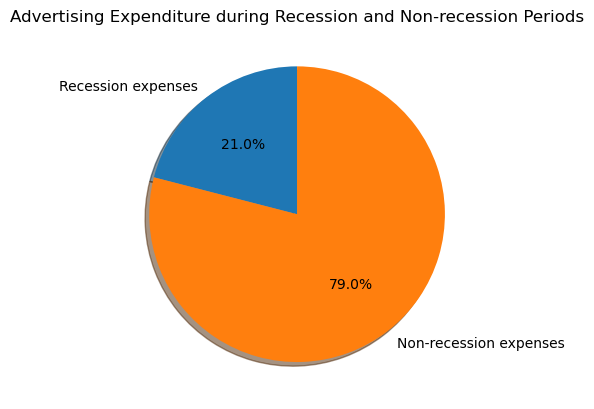

In [354]:
fig, ax = plt.subplots()

ax.pie(Proportions["Values"],
       labels = ["Recession expenses", "Non-recession expenses"], 
       autopct = "%1.1f%%",
       startangle = 90, 
       shadow = True,)

ax.set_title("Advertising Expenditure during Recession and Non-recession Periods")
plt.savefig("Pie_1.png")
plt.show()

In [355]:
Adv_vehicles_recc = Auto_sales[Auto_sales["Recession"] == 1].groupby("Vehicle_Type")["Advertising_Expenditure"].sum()
Adv_vehicles_recc

Vehicle_Type
Executivecar         3243
Mediumfamilycar    130612
Smallfamiliycar    102759
Sports              12568
Supperminicar       90728
Name: Advertising_Expenditure, dtype: int64

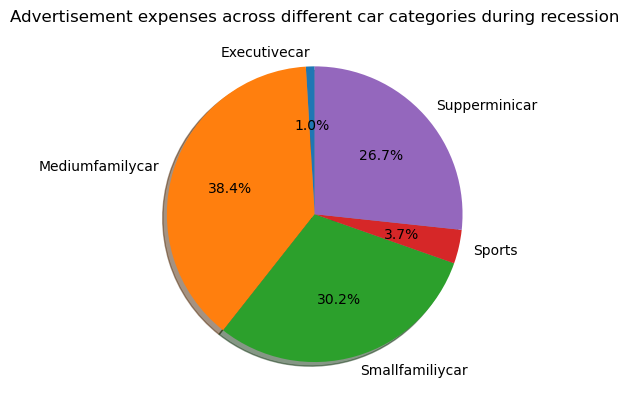

In [356]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(Adv_vehicles_recc,
       autopct = "%1.1f%%",
       startangle = 90,
       shadow = True,
       labels = Adv_vehicles_recc.index)

ax.set_title("Advertisement expenses across different car categories during recession")
plt.savefig("Pie_2.png")
plt.show()

In [357]:
Car_type_sales.reset_index(inplace = True)

In [360]:
Car_type_sales = Car_type_sales.sort_values(by = "Year")
Car_type_sales.set_index("Year", inplace = True)

In [361]:
Car_type_sales.head()

,Mediumfamilycar,Supperminicar,Smallfamiliycar,Sports,Executivecar
Year,,,,,
1980,720.625000,635.84,695.233333,NaN,NaN
1981,628.400000,630.90,638.420000,NaN,NaN
1982,723.271429,NaN,602.225000,102.0,NaN
1983,NaN,NaN,589.000000,NaN,NaN
1990,659.733333,754.80,629.257143,NaN,NaN


In [362]:
Year_unemp = Auto_sales_recc.groupby("Year")["unemployment_rate"].mean()
Year_unemp = pd.DataFrame(Year_unemp)
sales_unemp = pd.concat([Car_type_sales, Year_unemp], axis = 1)

In [363]:
sales_unemp.reset_index(inplace = True)
sales_unemp.drop(columns = "Year", inplace = True)

In [365]:
sales_unemp.set_index("unemployment_rate", inplace = True)
sales_unemp.head()

,Mediumfamilycar,Supperminicar,Smallfamiliycar,Sports,Executivecar
unemployment_rate,,,,,
3.950000,720.625000,635.84,695.233333,NaN,NaN
4.191667,628.400000,630.90,638.420000,NaN,NaN
4.100000,723.271429,NaN,602.225000,102.0,NaN
3.200000,NaN,NaN,589.000000,NaN,NaN
4.236364,659.733333,754.80,629.257143,NaN,NaN


In [374]:
sales_unemp = sales_unemp.sort_values(by = "unemployment_rate")
sales_unemp

,Mediumfamilycar,Supperminicar,Smallfamiliycar,Sports,Executivecar
unemployment_rate,,,,,
3.200000,NaN,NaN,589.000000,NaN,NaN
3.908333,642.140000,650.050,747.900000,NaN,564.0
3.950000,720.625000,635.840,695.233333,NaN,NaN
4.100000,644.950000,NaN,670.400000,214.0,NaN
4.100000,723.271429,NaN,602.225000,102.0,NaN
4.150000,689.700000,686.040,713.450000,NaN,NaN
4.191667,628.400000,630.900,638.420000,NaN,NaN
4.211111,636.200000,713.400,710.566667,NaN,NaN
4.222222,655.600000,686.300,623.400000,195.0,NaN


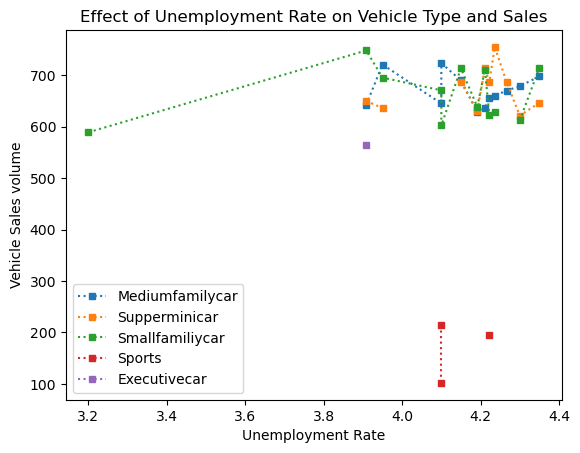

In [370]:
fig, ax = plt.subplots()
ax.plot(sales_unemp,
        marker = "s",
        markersize = 5,
        linestyle = "dotted",
        label = ["Mediumfamilycar", "Supperminicar", "Smallfamiliycar", "Sports", "Executivecar"])
ax.set_title("Effect of Unemployment Rate on Vehicle Type and Sales")
ax.set_xlabel("Unemployment Rate")
ax.set_ylabel("Vehicle Sales volume")
ax.legend()

plt.savefig("line_plot_3.png")
plt.show()

In [376]:
Auto_sales.head()

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [390]:
Auto_sales["City"].value_counts()
Sales_city = Auto_sales.groupby("City")["Automobile_Sales"].sum()
Sales_city = pd.DataFrame(Sales_city)
Sales_city.reset_index(inplace = True)

In [394]:
Sales_city

,City,Automobile_Sales
0,California,278495.00
1,Georgia,290418.64
2,Illinois,319408.00
3,New York,353913.50


In [400]:
import folium

with open("us-states.json", "r") as file:
    geodata = file.read()

US_map = folium.Map(location = [39.342709, -102.026200], zoom_start = 3)

folium.Choropleth(
    geo_data = geodata,
    data = Sales_city,
    columns = ["City", "Automobile_Sales"],
    key_on= "feature.properties.name",
    fill_color = "YlOrRd",
    legend_name = "Vehicle Sales Volume",
    reset = True).add_to(US_map)
US_map